In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import plotly.express as px

In [3]:
df1 = pd.read_excel(r"C:\Users\maria\OneDrive\Desktop\globalterrorismdb_0522dist.xlsx")
df2 = pd.read_excel(r"C:\Users\maria\OneDrive\Desktop\globalterrorismdb_2021Jan-June_1222dist.xlsx")

dirty = df1.append(df2, ignore_index = True)

C:\Users\maria\AppData\Local\Temp\ipykernel_33084\342744217.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dirty = df1.append(df2, ignore_index = True)


In [ ]:
dirty.columns
# Renaming columns for easier understanding
dirty.rename(columns = {'eventid': 'EventID', 'iyear': 'Year_Recorded', 'imonth': 'Month_Recorded', 'iday': 'Day_Recorded', 'approxdate': 'Approx_Date', 'extended': 'Incident_Extended', 'resolution': 'Date_Event_Resolved', 'country_txt':'Country', 'region_txt':'Region', 'provstate':'Province/State', 'city':'City', 'latitude':'Latitude', 'longitude':'Longitude'}, inplace=True)
dirty.rename(columns={'vicinity': 'Vicinity', 'crit1': 'Political/Economic/Reglious_Goals', 'crit2':'Intent_to_Coerce', 'crit3':'Outside_Influence', 'doubtterr':'Doubt_Terror_Report', 'alternative_txt':'Alternative_Designation', 'multiple':'Multiple_Attacks', 'success': 'Attack_Success', 'suicide':'Suicide_Attack'}, inplace = True)
dirty.rename(columns={'attacktype1_txt': 'AttackType', 'attacktype2_txt':'Second_AttackType', 'attacktype3_txt':'Third_AttackType', 'targtype1_txt':'Victim_Type', 'targsubtype1_txt':'Victim_SubType', 'corp1':'Corporate/Gov_Agency', 'target1':'Special_Victim', 'natlty1_txt': 'Nationality_Victim', 'gname':'Perp_GroupName', 'gsubname':'Perp_SubGroup', 'gname2':'2ndPerp_GroupName', 'gsubname2': '2ndPerp_Subgroup', 'gname3':'3rdPerp_GroupName', 'gsubname3':'3rdPerp_Subgroup'}, inplace=True)

In [ ]:
dirty.rename(columns={'guncertain1':'1stPerpSusp', 'guncertain2':'2ndPerpSusp', 'guncertain3':'3rdPerpSusp', 'nperps':'No_Perp_Capt', 'claimed':'Claimed', 'compclaim':'Comp_Claims', 'nkill':'No_Killed', 'nkillter':'No_Perp_Kled', 'nwound':'No_Inj', 'nwoundte':'No_Perp_Inj', 'property':'Property_Damaged', 'ishostkid':'Hostage/Kidnap_Vics', 'nhostkid':'No_Hostage/Kidnap_Vics', 'nhours': 'Hours_Held'}, inplace=True)
dirty.rename(columns={'ransom':'Ransom_Demanded', 'ransomamt':'Total_Ransom_Amt', 'ransompaid':'Total_Ransom_Paid', 'nreleased':'No_Rel_Vics'}, inplace=True)

In [ ]:
global_data = dirty[['EventID', 'Day_Recorded', 'Month_Recorded', 'Year_Recorded', 'Incident_Extended', 'Country', 'Region', 'City', 'Latitude', 'Longitude','Political/Economic/Reglious_Goals', 'Intent_to_Coerce', 'Outside_Influence', 'Doubt_Terror_Report', 'Alternative_Designation', 'Multiple_Attacks','Attack_Success', 'Suicide_Attack', 'AttackType', 'Second_AttackType', 'Third_AttackType', 'Victim_Type', 'Victim_SubType', 'Corporate/Gov_Agency', 'Special_Victim', 'Nationality_Victim', 'Perp_GroupName', '2ndPerp_GroupName', '3rdPerp_GroupName', '1stPerpSusp', '2ndPerpSusp', '3rdPerpSusp', 'No_Perp_Capt', 'Comp_Claims','Claimed','No_Killed', 'No_Inj', 'No_Perp_Inj', 'No_Perp_Kled', 'Property_Damaged', 'Hostage/Kidnap_Vics', 'Hours_Held','Ransom_Demanded', 'Total_Ransom_Amt', 'Total_Ransom_Paid', 'No_Rel_Vics']]
for cols in global_data:
    print(f'Column: {cols:35} | type:{str(global_data[cols].dtype):7} | missing percentage : {(global_data[cols].isna().sum()/len(global_data) * 100)}')

Column: EventID                             | type:int64   | missing percentage : 0.0
Column: Day_Recorded                        | type:int64   | missing percentage : 0.0
Column: Month_Recorded                      | type:int64   | missing percentage : 0.0
Column: Year_Recorded                       | type:int64   | missing percentage : 0.0
Column: Incident_Extended                   | type:int64   | missing percentage : 0.0
Column: Country                             | type:object  | missing percentage : 0.0
Column: Region                              | type:object  | missing percentage : 0.0
Column: City                                | type:object  | missing percentage : 0.19844782126652566
Column: Latitude                            | type:float64 | missing percentage : 2.201559632172771
Column: Longitude                           | type:float64 | missing percentage : 2.2020254721287955
Column: Political/Economic/Reglious_Goals   | type:int64   | missing percentage : 0.0
Column: I

In [ ]:
# dropping columns with missing data more >50%
global_data.drop(columns={'Alternative_Designation', 'Second_AttackType', 'Third_AttackType', '2ndPerp_GroupName', '3rdPerp_GroupName', '2ndPerpSusp', '3rdPerpSusp','Comp_Claims', 'Hours_Held', 'No_Rel_Vics', 'Total_Ransom_Amt', 'Total_Ransom_Paid'}, inplace=True)
Yes_No_mapping = {1:'Yes', 0:'No', -9:'Unknown'}
Float_mapping  = {1.0:'Yes', 0.0:'No', -9.0:'Unknown'}

C:\Users\maria\AppData\Local\Temp\ipykernel_26876\1653660961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_data.drop(columns={'Alternative_Designation', 'Second_AttackType', 'Third_AttackType', '2ndPerp_GroupName', '3rdPerp_GroupName', '2ndPerpSusp', '3rdPerpSusp','Comp_Claims', 'Hours_Held', 'No_Rel_Vics', 'Total_Ransom_Amt', 'Total_Ransom_Paid'}, inplace=True)


In [ ]:
global_data.dropna(subset = ['City', 'Latitude', 'Longitude','Multiple_Attacks', 'Victim_SubType', 'Corporate/Gov_Agency', 'Special_Victim', 'Nationality_Victim', '1stPerpSusp', 'No_Perp_Capt', 'Claimed', 'No_Killed', 'No_Inj', 'No_Perp_Inj', 'No_Perp_Kled', 'Hostage/Kidnap_Vics'], inplace = True)
global_data['Ransom_Demanded'].fillna(-9.0, inplace = True)

C:\Users\maria\AppData\Local\Temp\ipykernel_26876\3315423745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_data.dropna(subset = ['City', 'Latitude', 'Longitude','Multiple_Attacks', 'Victim_SubType', 'Corporate/Gov_Agency', 'Special_Victim', 'Nationality_Victim', '1stPerpSusp', 'No_Perp_Capt', 'Claimed', 'No_Killed', 'No_Inj', 'No_Perp_Inj', 'No_Perp_Kled', 'Hostage/Kidnap_Vics'], inplace = True)
C:\Users\maria\AppData\Local\Temp\ipykernel_26876\3315423745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_data['Ransom_Demanded'].fillna(-9.0, inplace = True)


In [ ]:
global_data['Incident_Extended'] = global_data['Incident_Extended'].apply(lambda x:Yes_No_mapping[x])
global_data['Political/Economic/Reglious_Goals'] = global_data['Political/Economic/Reglious_Goals'].apply(lambda x:Yes_No_mapping[x])
global_data['Intent_to_Coerce'] = global_data['Intent_to_Coerce'].apply(lambda x:Yes_No_mapping[x])
global_data['Outside_Influence'] = global_data['Outside_Influence'].apply(lambda x:Yes_No_mapping[x])
global_data['Suicide_Attack'] = global_data['Suicide_Attack'].apply(lambda x:Yes_No_mapping[x])
global_data['Attack_Success'] = global_data['Attack_Success'].apply(lambda x:Yes_No_mapping[x])
global_data['Doubt_Terror_Report'] = global_data['Doubt_Terror_Report'].apply(lambda x:Yes_No_mapping[x])
global_data['Multiple_Attacks'] = global_data['Multiple_Attacks'].apply(lambda x:Float_mapping[x])
global_data['Ransom_Demanded'] = global_data['Ransom_Demanded'].apply(lambda x:Float_mapping[x])

C:\Users\maria\AppData\Local\Temp\ipykernel_26876\2336355724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_data['Incident_Extended'] = global_data['Incident_Extended'].apply(lambda x:Yes_No_mapping[x])
C:\Users\maria\AppData\Local\Temp\ipykernel_26876\2336355724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_data['Political/Economic/Reglious_Goals'] = global_data['Political/Economic/Reglious_Goals'].apply(lambda x:Yes_No_mapping[x])
C:\Users\maria\AppData\Local\Temp\ipykernel_26876\

In [ ]:
global_data['1stPerpSusp'] = global_data['1stPerpSusp'].apply(lambda x:Float_mapping[x])
global_data['Claimed'] = global_data['Claimed'].apply(lambda x:Float_mapping[x])
global_data['Property_Damaged'] = global_data['Property_Damaged'].apply(lambda x:Yes_No_mapping[x])
global_data['Hostage/Kidnap_Vics'] = global_data['Hostage/Kidnap_Vics'].apply(lambda x:Float_mapping[x])

C:\Users\maria\AppData\Local\Temp\ipykernel_26876\3311546019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_data['1stPerpSusp'] = global_data['1stPerpSusp'].apply(lambda x:Float_mapping[x])
C:\Users\maria\AppData\Local\Temp\ipykernel_26876\3311546019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_data['Claimed'] = global_data['Claimed'].apply(lambda x:Float_mapping[x])
C:\Users\maria\AppData\Local\Temp\ipykernel_26876\3311546019.py:3: SettingWithCopyWarning: 
A value is trying to be 

In [ ]:
# Creating new date column and also converting eventid date, dropping all rows where Day_Recorded == 0
global_data = global_data[global_data['Day_Recorded'] != 0]
global_data['Year_Recorded'] = global_data['Year_Recorded'].map(str)
global_data['Day_Recorded'] = global_data['Day_Recorded'].map(str)
global_data['Month_Recorded'] = global_data['Month_Recorded'].map(str)

# combining day, month , year to create a new date column
global_data['Date_Recorded'] = pd.to_datetime(global_data['Day_Recorded'] + '/' + global_data['Month_Recorded'] + '/' + global_data['Year_Recorded'])

C:\Users\maria\AppData\Local\Temp\ipykernel_26876\655217782.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  global_data['Date_Recorded'] = pd.to_datetime(global_data['Day_Recorded'] + '/' + global_data['Month_Recorded'] + '/' + global_data['Year_Recorded'])


In [ ]:
global_data.drop(columns={'Day_Recorded'}, inplace=True)
global_data['Day_of_Week'] = global_data['Date_Recorded'].dt.day_name()

month_mapping = {'1':'January', '2':'February', '3':'March', '4':'April', '5':'May', '6':'June', '7':'July', '8':'August', '9':'September', '10':'October', '11':'November', '12':'December'}
global_data['Month_Recorded'] = global_data['Month_Recorded'].apply(lambda x:month_mapping[x])

In [ ]:
# to check for columns with duplicate data
def columsn_with_duplicates(df, show_examples = False):
     dup_info = {}
     for col in df.columns:
        dup_mask = df[col].duplicated(keep=False)  # Mark all dup instances
        if dup_mask.any():
            unique_count = df[col].nunique()
            total_rows = len(df)
            dup_info[col] = {
                'unique_values': unique_count,
                'duplicate_percentage': (1 - unique_count / total_rows) * 100
            }
            if show_examples:
                examples = df[dup_mask][col].unique()[:5]  # First 5 dup values
                dup_info[col]['example_duplicates'] = examples.tolist()
        return dup_info

info = columsn_with_duplicates(global_data, show_examples=True)
print(info)

{}


In [ ]:
# Total Attacks 
total_attacks = global_data['EventID'].count()
import plotly.graph_objects as go 
fig = go.Figure(go.Indicator(
    mode = "number",
    value=total_attacks,
    title={'text': 'Total Number of Attacks:', 'font':{'size': 16}},
    domain={'x':[0,1], 'y':[0,1]}
))
fig.update_layout(paper_bgcolor = 'lightgray', height = 400, width = 400)
fig.show()

In [ ]:
total_no_countries = global_data['Country'].nunique()
fig = go.Figure(go.Indicator(
    mode = "number",
    value=total_no_countries,
    title={'text': 'Total No of Countries in the database is: ', 'font': {'size': 15}},
    domain={'x':[0,1], 'y':[0,1]}
))
fig.update_layout(paper_bgcolor = 'crimson', height = 400, width = 450)
fig.show()

In [ ]:
no_of_victims = global_data['No_Killed'].sum()
fig = go.Figure(go.Indicator(
    mode = "number",
    value=no_of_victims,
    title={'text': 'Total Number of Victims over The Years:', 'font':{'size': 16}},
    domain={'x':[0,1], 'y':[0,1]}
))
fig.update_layout(paper_bgcolor = 'gray', height = 400, width = 450)
fig.show()

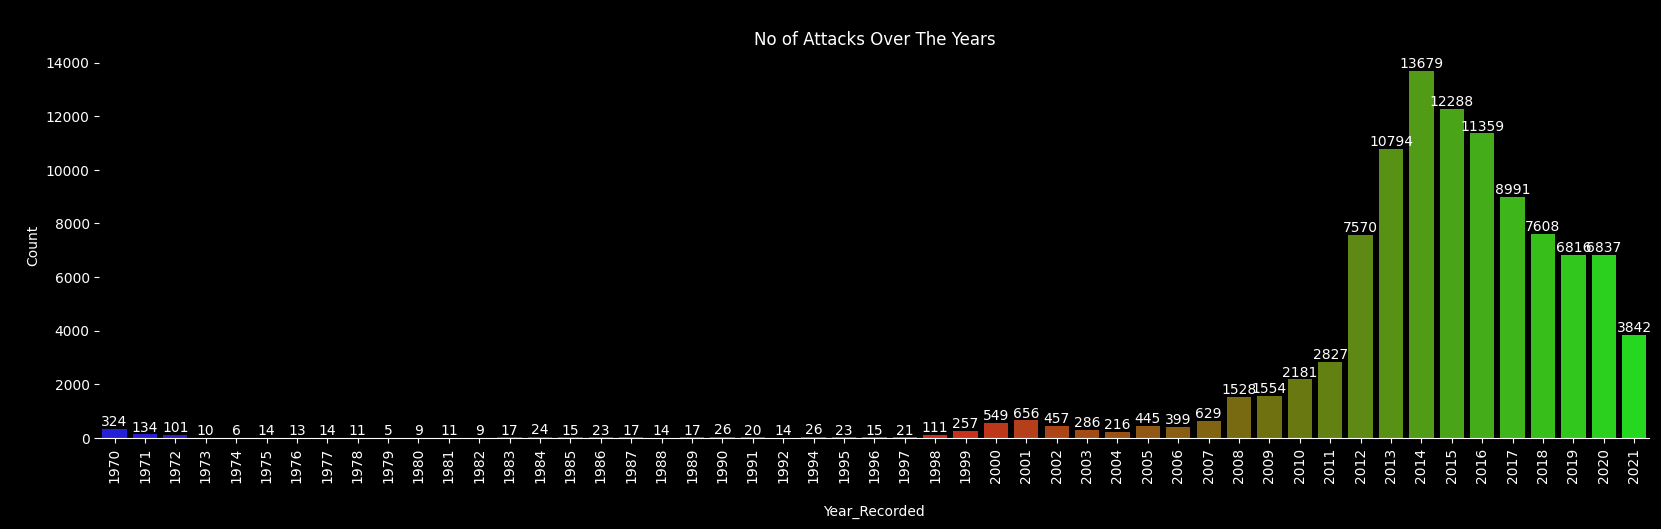

In [ ]:
# <!-- No of Attacks over the years -->
year_trend = global_data.groupby('Year_Recorded')['EventID'].count().reset_index(name = 'Count')
fig,ax = plt.subplots(figsize = (20,5))
sns.barplot(x = 'Year_Recorded', y = 'Count', data= year_trend, palette='brg')
ax.set_title("\nNo of Attacks Over The Years")
ax.set(xlabel="\nYear_Recorded", ylabel="\nCount")
sns.despine(ax = ax, top = True, right = True, left = True, bottom = False)
ax.tick_params(axis = 'x', rotation = 90)
for bars in ax.containers:
    ax.bar_label(bars, label_type='edge')
plt.show()

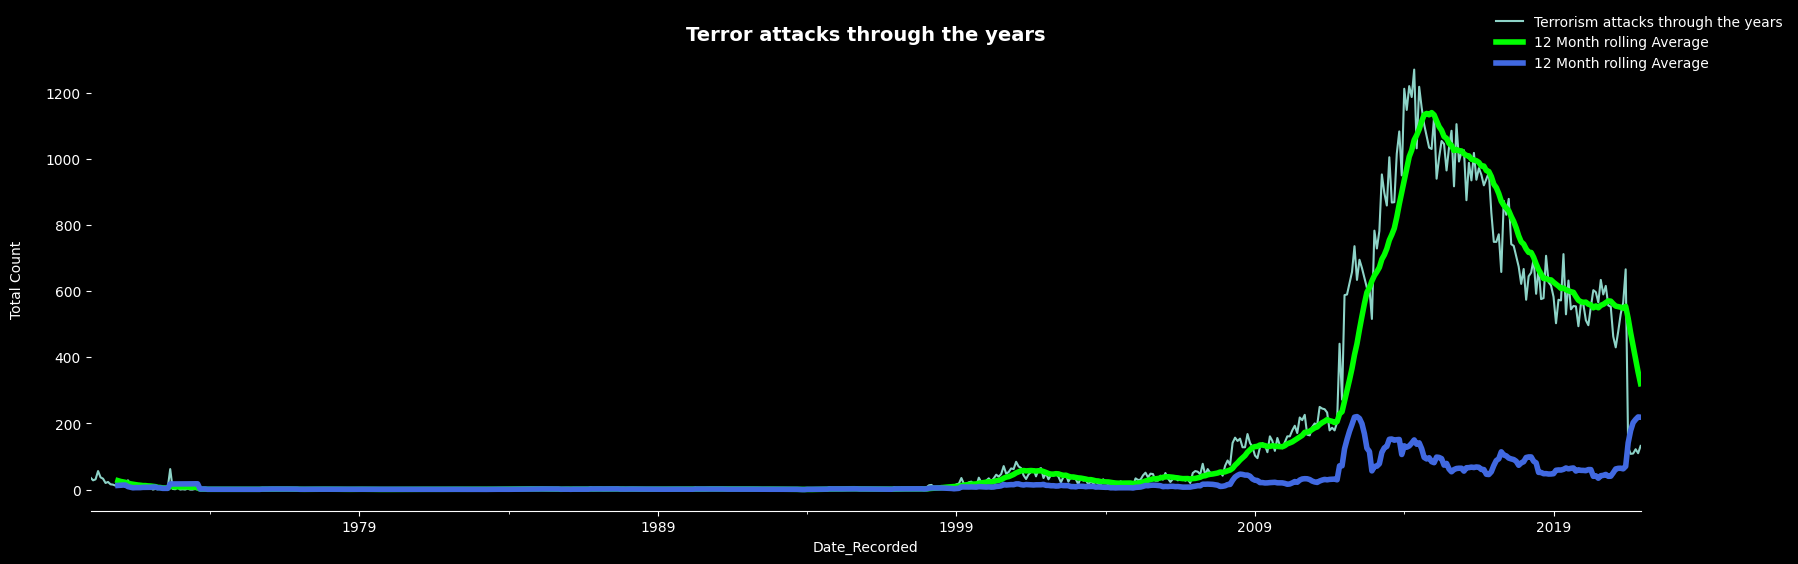

In [ ]:
fig,ax = plt.subplots(figsize = (20,6))
global_data.set_index('Date_Recorded').resample('M').size().plot(label = 'Terrorism attacks through the years',ax = ax)
global_data.set_index('Date_Recorded').resample('M').size().rolling(window = 12).mean().plot(color = 'lime', linewidth = 4, label = '12 Month rolling Average', ax = ax)
global_data.set_index('Date_Recorded').resample('M').size().rolling(window = 12).std().plot(color = 'royalblue', linewidth = 4, label = '12 Month rolling Average', ax = ax)
ax.set_title("Terror attacks through the years", fontsize = 14, fontweight = 'bold')
ax.set(ylabel = "Total Count\n")
ax.legend(bbox_to_anchor =(1.1,1.1), frameon = False)
sns.despine(ax = ax, top = True, right = True, left = True, bottom = False)

In [ ]:
# According to our chart and supporting  data from the web, 2014 is recorded as the year with peaks in both attacks and deaths,
# this is primarily driven by the rise of groups like ISIS
attacks_2014 = global_data.loc[global_data['Year_Recorded'] == '2014']
attacks_2014

,EventID,Month_Recorded,Year_Recorded,Incident_Extended,Country,Region,City,Latitude,Longitude,Political/Economic/Reglious_Goals,...,Claimed,No_Killed,No_Inj,No_Perp_Inj,No_Perp_Kled,Property_Damaged,Hostage/Kidnap_Vics,Ransom_Demanded,Date_Recorded,Day_of_Week
125363,201401010001,January,2014,No,Colombia,South America,Convencion,8.868790,-73.194094,Yes,...,No,0.0,0.0,0.0,0.0,Yes,No,Unknown,2014-01-01,Wednesday
125364,201401010002,January,2014,No,Somalia,Sub-Saharan Africa,Mogadishu,2.059818,45.326114,Yes,...,Yes,4.0,20.0,0.0,2.0,Yes,No,Unknown,2014-01-01,Wednesday
125365,201401010003,January,2014,No,Pakistan,South Asia,Quetta,30.200820,66.994352,Yes,...,Yes,3.0,31.0,0.0,1.0,Yes,No,Unknown,2014-01-01,Wednesday
125368,201401010007,January,2014,No,Iraq,Middle East & North Africa,Mosul,36.354146,43.143571,Yes,...,No,2.0,6.0,0.0,1.0,Unknown,No,Unknown,2014-01-01,Wednesday
125369,201401010017,January,2014,No,Iraq,Middle East & North Africa,Yathrib,33.994589,44.357271,Yes,...,No,2.0,3.0,0.0,0.0,Unknown,No,Unknown,2014-01-01,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142320,201412310103,December,2014,No,Yemen,Middle East & North Africa,Ash Shihr,14.762731,49.605729,Yes,...,No,1.0,0.0,0.0,0.0,Yes,No,Unknown,2014-12-30,Tuesday
142321,201412310104,December,2014,No,Yemen,Middle East & North Africa,Ash Shihr,14.762731,49.605729,Yes,...,No,0.0,0.0,0.0,0.0,Yes,No,Unknown,2014-12-30,Tuesday
142323,201412310106,December,2014,Yes,Indonesia,Southeast Asia,Lembah Napu,-1.753123,120.643559,Yes,...,No,1.0,0.0,0.0,0.0,No,Yes,No,2014-12-31,Wednesday
143604,201501270001,December,2014,No,Afghanistan,South Asia,Saberi district,33.566561,69.878354,Yes,...,Yes,5.0,0.0,0.0,0.0,No,No,Unknown,2014-12-27,Saturday


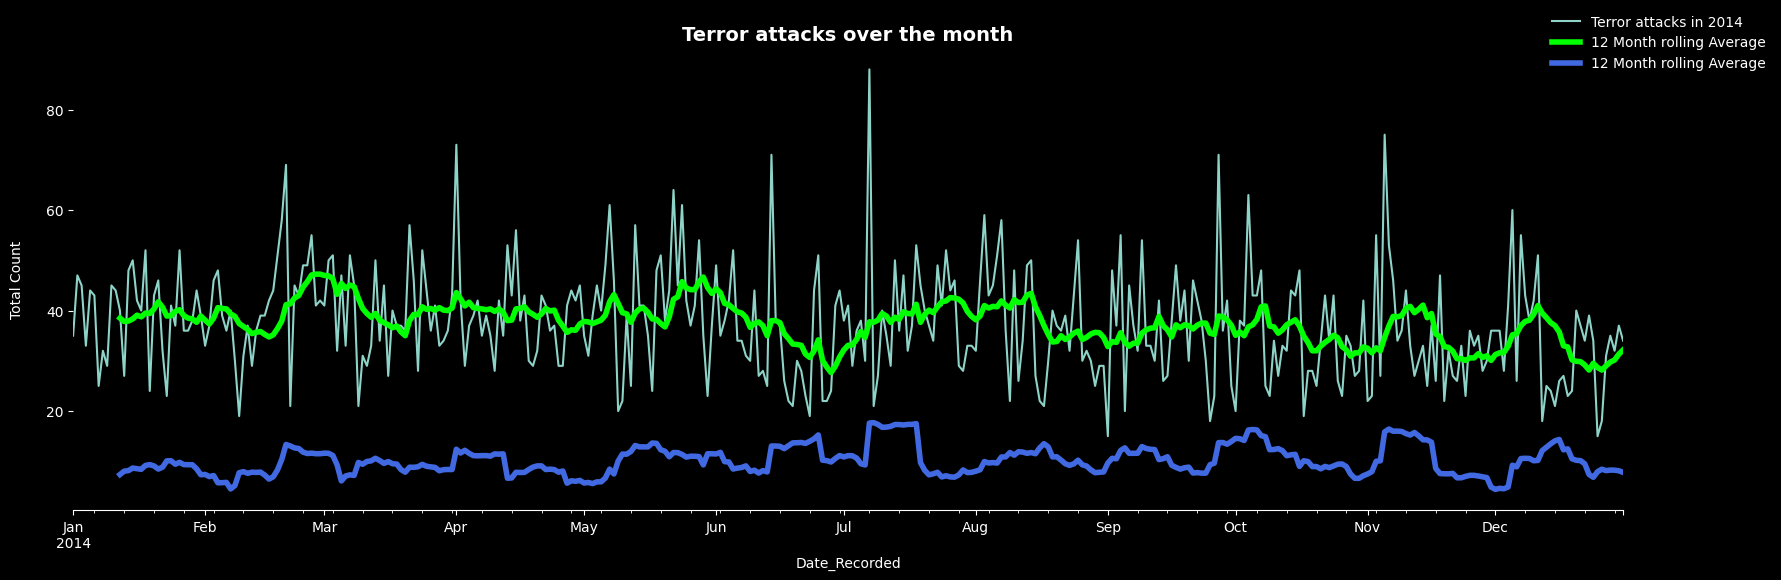

In [ ]:
fig,ax = plt.subplots(figsize = (20,6))
attacks_2014.set_index('Date_Recorded').resample('D').size().plot(label = 'Terror attacks in 2014',ax = ax)
attacks_2014.set_index('Date_Recorded').resample('D').size().rolling(window = 12).mean().plot(color = 'lime', linewidth = 4, label = '12 Month rolling Average', ax = ax)
attacks_2014.set_index('Date_Recorded').resample('D').size().rolling(window = 12).std().plot(color = 'royalblue', linewidth = 4, label = '12 Month rolling Average', ax = ax)
ax.set_title("Terror attacks over the month", fontsize = 14, fontweight = 'bold')
ax.set(ylabel = "Total Count\n")
ax.legend(bbox_to_anchor =(1.1,1.1), frameon = False)
sns.despine(ax = ax, top = True, right = True, left = True, bottom = False)

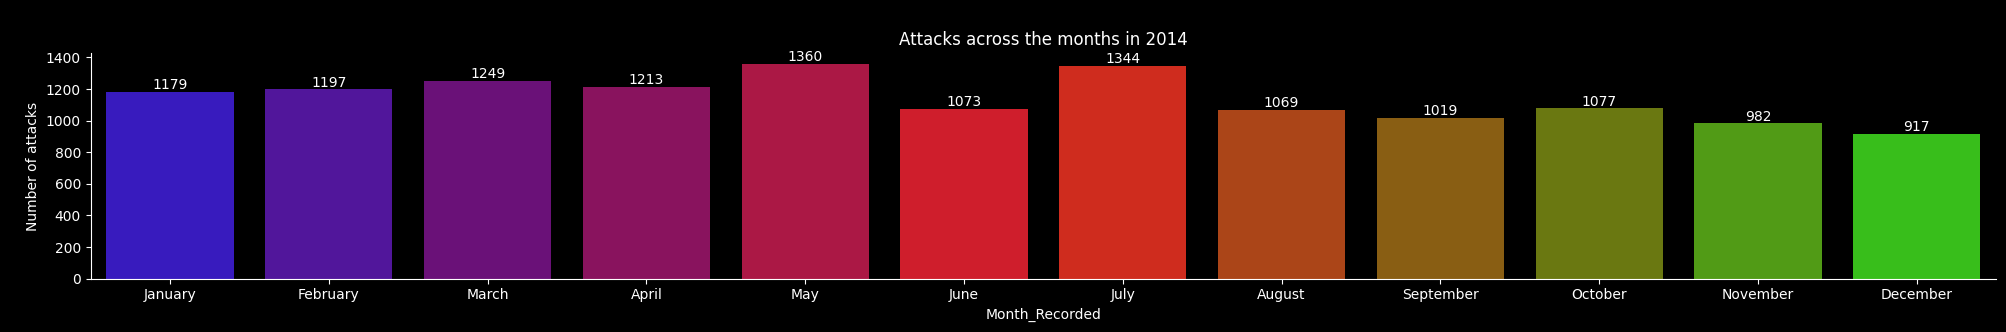

In [ ]:
# Number of attacks per month in 2014
month_2014 = attacks_2014.groupby('Month_Recorded')['EventID'].count().reset_index(name = 'Count')
month_2014_dict = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
month_2014 = month_2014.sort_values('Month_Recorded', key = lambda x: x.apply(lambda x:month_2014_dict[x]))
plt.figure(figsize=(20, 3))
ax = sns.barplot(x = 'Month_Recorded', y = 'Count', data = month_2014, palette='brg')
sns.despine()
plt.tight_layout()
plt.title('\nAttacks across the months in 2014')
plt.ylabel('\nNumber of attacks')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


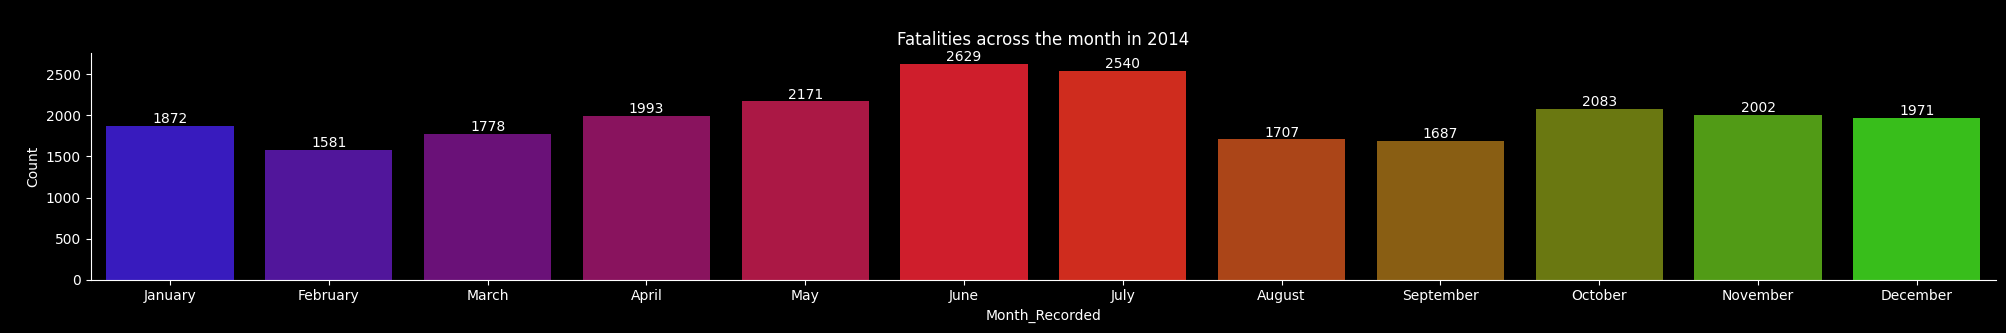

In [ ]:
month_fatalities = attacks_2014.groupby('Month_Recorded')['No_Killed'].sum().reset_index(name = 'Fatalities')
month_fatalities = month_fatalities.sort_values('Month_Recorded', key = lambda x: x.apply(lambda x:month_2014_dict[x]))
plt.figure(figsize=(20, 3))
ax = sns.barplot(x = 'Month_Recorded', y = 'Fatalities', data = month_fatalities, palette='brg')
sns.despine()
plt.tight_layout()
plt.title('\nFatalities across the month in 2014')
plt.ylabel('\nCount')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [ ]:
summary_table_2014 = attacks_2014.groupby('Month_Recorded').agg({
    'EventID': 'size',
    'No_Killed':'sum',
    'No_Inj':'sum',
    'Hostage/Kidnap_Vics': lambda x: (x == 'Yes').sum(),
}).rename(columns = {
    'EventID':'Total_Attacks',
    'No_Killed':'Total_Fatalities',
    'No_Inj':'Total_Injuries',
    'Hostage/Kidnap_Vics':'Total Hostages/Kidnapped'
})

summary_table_2014 = summary_table_2014.sort_values('Month_Recorded', key = lambda x: x.apply(lambda x:month_2014_dict[x]))
summary_table_2014

,Total_Attacks,Total_Fatalities,Total_Injuries,Total Hostages/Kidnapped
Month_Recorded,,,,
January,1179,1872.0,3229.0,55
February,1197,1581.0,3065.0,50
March,1249,1778.0,3119.0,59
April,1213,1993.0,3766.0,74
May,1360,2171.0,3744.0,78
June,1073,2629.0,3069.0,72
July,1344,2540.0,3160.0,98
August,1069,1707.0,2920.0,90
September,1019,1687.0,2988.0,95


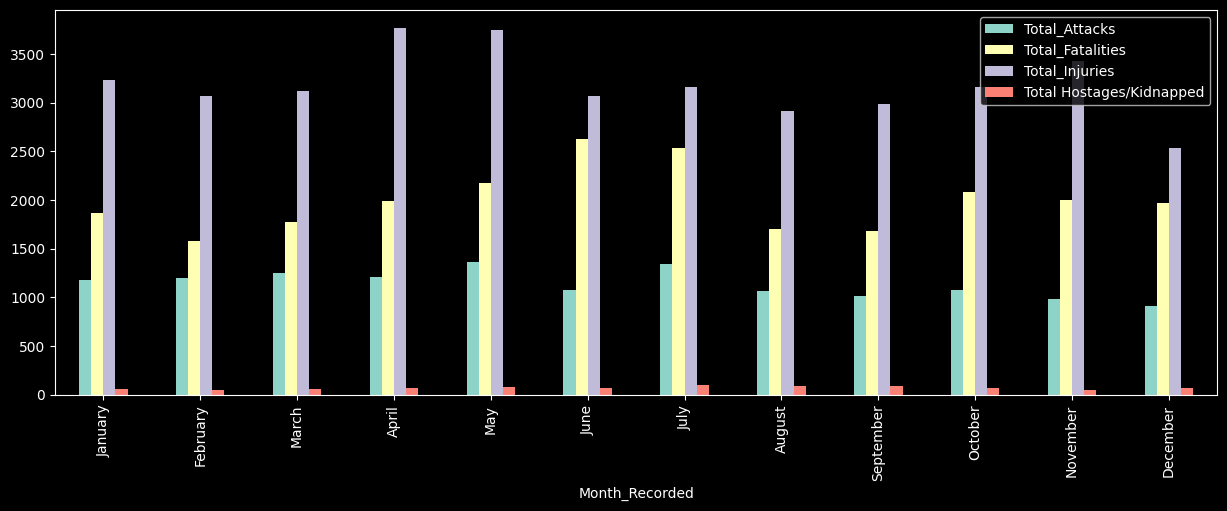

In [ ]:
summary_table_2014.plot.bar(figsize=(15,5))
ax = plt.gcf().get_axes() # gets the current figure and then the axes
plt.show()

In [ ]:
# What countries were the most affected in 2014
countries_2014 = pd.pivot_table(
   attacks_2014,
   index=['Country'],
   aggfunc={'EventID': len, 'No_Killed': np.sum, 'No_Inj': np.sum, 'Hostage/Kidnap_Vics':lambda x: (x == 'Yes').sum()}
).rename(columns={'EventID': 'Total_Attacks', 'No_Killed':'Total_Killed', 'No_Inj':'Total_Injuries', 'Hostage/Kidnap_Vics':'Total Hostage/Kidnaps'}).sort_values(['Total_Attacks','Total_Killed', 'Total_Injuries', 'Total Hostage/Kidnaps'], ascending = [False, False, False, False])
countries_2014 = countries_2014.head(15)

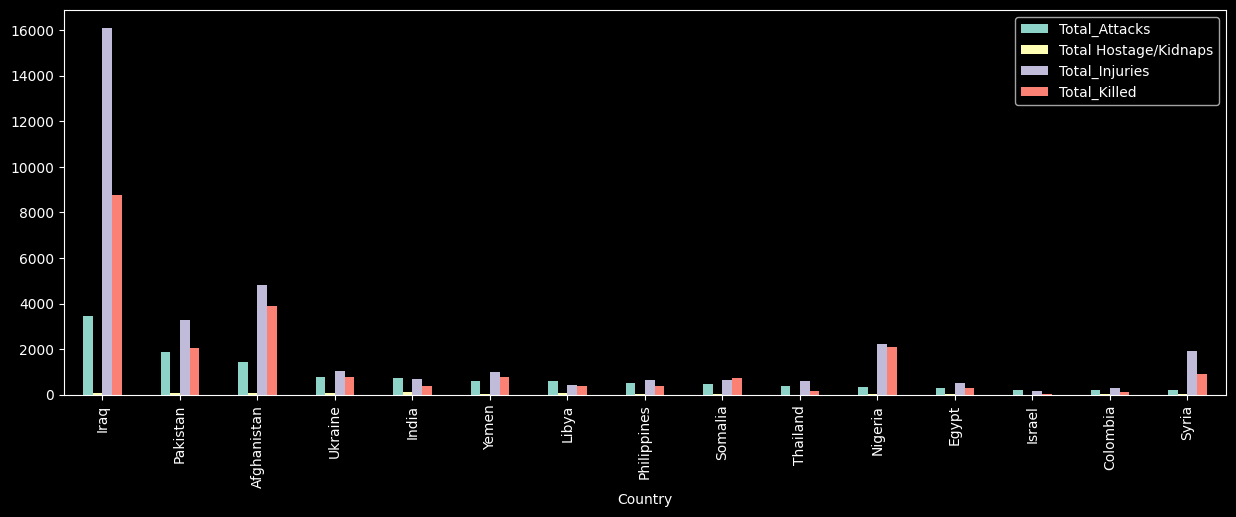

In [ ]:
countries_2014.plot.bar(figsize=(15,5))
ax = plt.gcf().get_axes() # gets the current figure and then the axes
plt.show()

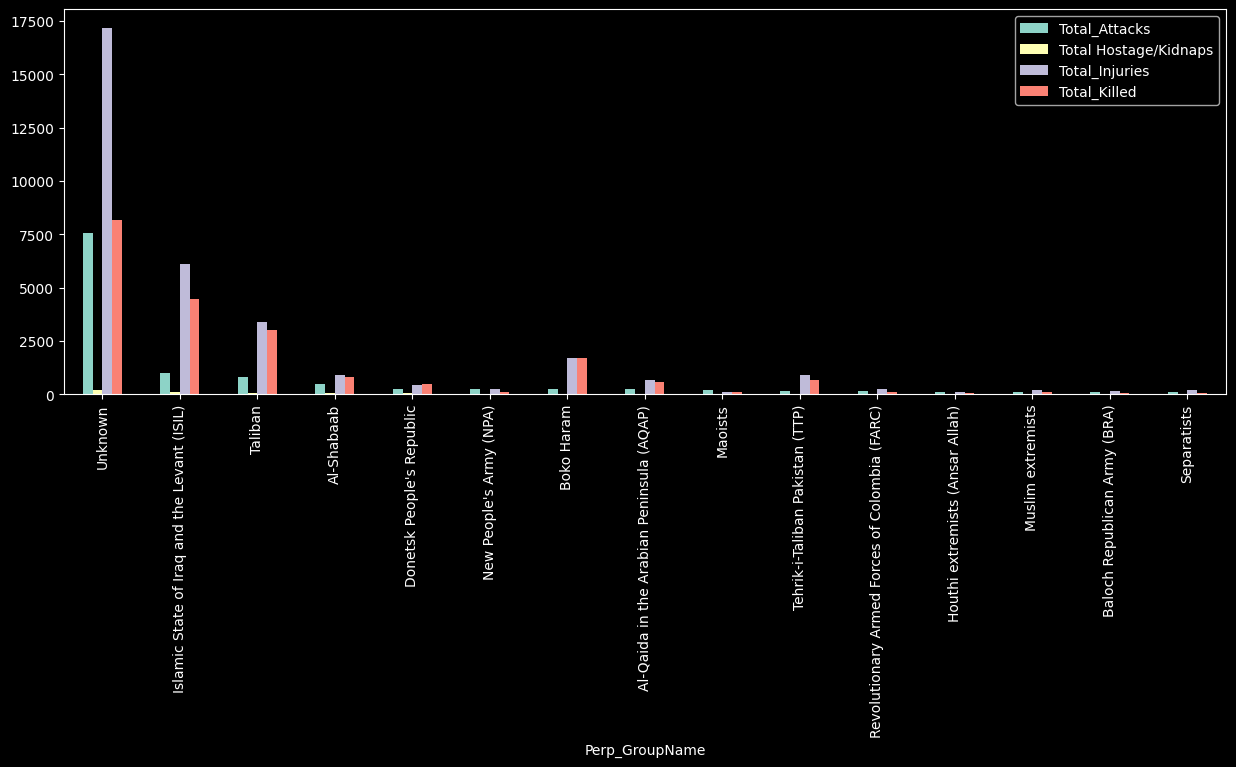

In [ ]:
# Perpetrators responsible for these attacks
perpetrators_2014 = pd.pivot_table(
   attacks_2014,
   index=['Perp_GroupName'],
   aggfunc={'EventID': len, 'No_Killed': np.sum, 'No_Inj': np.sum, 'Hostage/Kidnap_Vics':lambda x: (x == 'Yes').sum()}
).rename(columns={'EventID': 'Total_Attacks', 'No_Killed':'Total_Killed', 'No_Inj':'Total_Injuries', 'Hostage/Kidnap_Vics':'Total Hostage/Kidnaps'}).sort_values(['Total_Attacks','Total_Killed', 'Total_Injuries', 'Total Hostage/Kidnaps'], ascending = False)
perpetrators_2014 = perpetrators_2014.head(15)
perpetrators_2014.plot.bar(figsize=(15,5))
ax = plt.gcf().get_axes() # gets the current figure and then the axes
plt.show()

In [ ]:
successful_attacks = attacks_2014.groupby('Perp_GroupName').agg({
'Attack_Success': lambda x: (x == 'Yes').sum(),
'Suicide_Attack' : lambda x: (x == 'Yes').sum()
}).rename(columns = {'Attack_Success': 'Successful_Attacks'}).sort_values(['Successful_Attacks', 'Suicide_Attack'], ascending = [False, False])
successful_attacks = successful_attacks.loc[successful_attacks['Successful_Attacks'] >=20]
successful_attacks

,Successful_Attacks,Suicide_Attack
Perp_GroupName,,
Unknown,6801,225
Islamic State of Iraq and the Levant (ISIL),968,126
Taliban,795,126
Al-Shabaab,448,18
Donetsk People's Republic,247,1
Boko Haram,219,32
Al-Qaida in the Arabian Peninsula (AQAP),205,24
New People's Army (NPA),202,0
Maoists,181,0


In [ ]:
successful_attacks_monthly = attacks_2014.groupby('Month_Recorded').agg({
    'EventID' : 'count',
'Attack_Success': lambda x: (x == 'Yes').sum(),
'Suicide_Attack' : lambda x: (x == 'Yes').sum()
}).rename(columns = {'Attack_Success': 'Successful_Attacks', 'EventID':'Total_Attacks'}).sort_values(['Successful_Attacks', 'Suicide_Attack'], ascending = [False, False])

successful_attacks_monthly = successful_attacks_monthly.sort_values('Month_Recorded', key = lambda x: x.apply(lambda x:month_2014_dict[x]))
successful_attacks_monthly

,Total_Attacks,Successful_Attacks,Suicide_Attack
Month_Recorded,,,
January,1179,1076,57
February,1197,1077,56
March,1249,1136,55
April,1213,1089,58
May,1360,1244,62
June,1073,1009,51
July,1344,1215,49
August,1069,984,31
September,1019,932,33


In [ ]:
fig = px.bar(
    data_frame=successful_attacks,
    x = successful_attacks.index,
    y = ['Successful_Attacks', 'Suicide_Attack'],
    opacity=0.8,
    orientation='v',
    barmode='group',
    title = 'Terror Groups with most successful attacks and suicide bombing attempts'
)
fig.update_layout(legend = dict(
    title = 'Total Count',
    x = 1.05,
    y = 1,
    orientation = 'v',
    font = dict(
        family = "Arial",
        size = 12,
        color = "black"

    )
),
width = 800, height = 650)
fig.show()

In [ ]:
Bombing = attacks_2014['AttackType'].value_counts()['Bombing/Explosion']
Armed = attacks_2014['AttackType'].value_counts()['Armed Assault']
Assassination = attacks_2014['AttackType'].value_counts()['Assassination']
Hostage_Kidnap = attacks_2014['AttackType'].value_counts()['Hostage Taking (Kidnapping)']
Facility = attacks_2014['AttackType'].value_counts()['Facility/Infrastructure Attack']
Unknown = attacks_2014['AttackType'].value_counts()['Unknown']
Unarmed = attacks_2014['AttackType'].value_counts()['Unarmed Assault']
Hostage_Taking = attacks_2014['AttackType'].value_counts()['Hostage Taking (Barricade Incident)']
Hijacking = attacks_2014['AttackType'].value_counts()['Hijacking']

import plotly.express as px
names = ['Bombing/Explosion', 'Armed Assault', 'Assassination', 'Hostage Taking (Kidnapping)', 'Facility/Infrastructure', 'Unknown','Unarmed Assault','Hostage Taking (Barricade Incident)', 'Hijacking']
size = [Bombing, Armed, Assassination, Hostage_Kidnap, Facility, Unknown, Unarmed, Hostage_Taking, Hijacking]
# Create the pie chart
fig = px.pie( 
             values=size, 
             names=names, 
             title='Terror Tactics used in 2014')

# Display the chart
fig.show()

In [ ]:
targets_2014 = pd.pivot_table(
   attacks_2014,
   index=['Victim_Type'],
   aggfunc={'EventID': len, 'No_Killed': np.sum, 'No_Inj': np.sum}
).rename(columns={'EventID': 'Total_Attacks', 'No_Killed':'Total_Killed', 'No_Inj':'Total_Injuries'}).sort_values(['Total_Attacks','Total_Killed', 'Total_Injuries'], ascending = False)


fig = px.bar(
    data_frame=targets_2014,
    x = targets_2014.index,
    y = ['Total_Attacks', 'Total_Injuries', 'Total_Killed'],
    opacity=0.8,
    orientation='v',
    barmode='group',
    title = 'Victims who were targeted in 2014'
)
fig.update_layout(legend = dict(
    title = 'Total Count',
    x = 1,
    y = 1,
    orientation = 'v',
    font = dict(
        family = "Arial",
        size = 12,
        color = "black"

    ),
    bgcolor="lightgray",
        bordercolor="black",
        borderwidth=1
)
)
fig.show()

In [ ]:
claimed_2014 = attacks_2014.groupby('Month_Recorded').agg({
    'EventID': 'count',                    # Count total events per month
    'Claimed': lambda x: (x == 'Yes').sum(),  # Count only 'Yes' for claimed incidents
    'Perp_GroupName': lambda x: x[attacks_2014.loc[x.index, 'Claimed'] == 'Yes'].value_counts().to_dict()  # Groups claiming responsibility
}).rename(columns={
    'EventID': 'Total_Events',            # Rename for clarity
    'Claimed': 'Claimed_Incidents',        # Rename to reflect count of claimed incidents
    'Perp_GroupName': 'Claimed_By'              # Rename to indicate groups claiming responsibility
})
claimed_2014.sort_values('Month_Recorded', key = lambda x: x.apply(lambda x:month_2014_dict[x]))
claimed_2014.to_csv("Claimed.csv", index = True)
claimed_2014

,Total_Events,Claimed_Incidents,Claimed_By
Month_Recorded,,,
April,1213,181,"{'Taliban': 48, 'Islamic State of Iraq and the..."
August,1069,191,"{'Taliban': 59, 'Islamic State of Iraq and the..."
December,917,196,"{'Taliban': 49, 'Islamic State of Iraq and the..."
February,1197,131,{'Islamic State of Iraq and the Levant (ISIL)'...
January,1179,158,"{'Taliban': 27, 'Tehrik-i-Taliban Pakistan (TT..."
July,1344,214,{'Islamic State of Iraq and the Levant (ISIL)'...
June,1073,167,"{'Taliban': 32, 'Islamic State of Iraq and the..."
March,1249,153,{'Islamic State of Iraq and the Levant (ISIL)'...
May,1360,205,"{'Taliban': 62, 'Islamic State of Iraq and the..."


In [ ]:
attacks_per_perpetrator = (
    attacks_2014.groupby(['Country', 'Perp_GroupName'], as_index=False).size().rename(columns = {'size':'No_of_Attacks'})
)
top_org_per_country = (
    attacks_per_perpetrator.sort_values(['Country', 'No_of_Attacks'],  ascending = [True, False]).drop_duplicates(subset =['Country'], keep = 'first').reset_index(drop = True)
)
top_org_per_country

,Country,Perp_GroupName,No_of_Attacks
0,Afghanistan,Taliban,826
1,Albania,Unknown,2
2,Algeria,Unknown,5
3,Australia,Informal Anarchist Federation,2
4,Azerbaijan,Unknown,2
...,...,...,...
91,United States,Anti-Government extremists,8
92,Venezuela,Unknown,4
93,West Bank and Gaza Strip,Unknown,56
94,Yemen,Al-Qaida in the Arabian Peninsula (AQAP),227


In [ ]:
political_intent_outside_attacks = (
    attacks_2014
    .groupby('Month_Recorded')
    .agg(
        Total_Attacks = ('EventID', 'size'),

        # ---- Political/Economic/Reglious_Goals ----
        PER_Goals_Yes  = ('Political/Economic/Reglious_Goals', lambda x: (x=='Yes').sum()),
        PER_Goals_No   = ('Political/Economic/Reglious_Goals', lambda x: (x=='No').sum()),
        PER_Goals_Pct  = ('Political/Economic/Reglious_Goals', lambda x: (x=='Yes').sum() / x.size * 100),

        # ---- Intent to Coerce ----
        Coerce_Yes     = ('Intent_to_Coerce', lambda x: (x=='Yes').sum()),
        Coerce_No      = ('Intent_to_Coerce', lambda x: (x=='No').sum()),
        Coerce_Pct     = ('Intent_to_Coerce', lambda x: (x=='Yes').sum() / x.size * 100),

        # ---- Outside Influence ----
        Outside_Yes    = ('Outside_Influence', lambda x: (x=='Yes').sum()),
        Outside_No     = ('Outside_Influence', lambda x: (x=='No').sum()),
        Outside_Pct    = ('Outside_Influence', lambda x: (x=='Yes').sum() / x.size * 100)
    )
    .sort_values(['Coerce_Yes', 'Outside_Yes'], ascending=False)
    .round(2)                     # nice percentages
)

political_intent_outside_attacks = political_intent_outside_attacks.sort_values('Month_Recorded', key = lambda x: x.apply(lambda x:month_2014_dict[x]))
political_intent_outside_attacks

,Total_Attacks,PER_Goals_Yes,PER_Goals_No,PER_Goals_Pct,Coerce_Yes,Coerce_No,Coerce_Pct,Outside_Yes,Outside_No,Outside_Pct
Month_Recorded,,,,,,,,,,
January,1179,1172,7,99.41,1170,9,99.24,1027,152,87.11
February,1197,1182,15,98.75,1196,1,99.92,987,210,82.46
March,1249,1233,16,98.72,1248,1,99.92,1040,209,83.27
April,1213,1194,19,98.43,1209,4,99.67,1059,154,87.30
May,1360,1343,17,98.75,1354,6,99.56,1137,223,83.60
June,1073,1056,17,98.42,1067,6,99.44,874,199,81.45
July,1344,1339,5,99.63,1331,13,99.03,1057,287,78.65
August,1069,1060,9,99.16,1065,4,99.63,894,175,83.63
September,1019,1011,8,99.21,1016,3,99.71,851,168,83.51
